## Observations and Insights 

In [1]:
## 3 observations from the data below 

## 1. 2 out of 10 drugs showed the most promising results holding a mean tumor volume under 40mm3 during the
    ## testing phases

## 2. As a result of showing the best results out of the medications these 2 drugs, Capomulin and Ramicane had the
    ## largest amount of tests performed

## 3. Drug Infubolin averaged 52mm3 tumor volume but showed an outlier averaging approx 40mm3 tumor volume comparable
    ## to Capomulin and Ramicane

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results,mouse_metadata,how='left', on='Mouse ID')
# Display the data table for preview

mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
mice_df = pd.DataFrame(mouse_df)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 1893)
mice_df = mice_df.rename(columns={"Mouse ID":"mouse_id","Drug Regimen":"drug_regimen", "Weight (g)":"weight_g", "Tumor Volume (mm3)":"tumor_vol_mm3", "Metastatic Sites":"metastatic_sites" })
mice_df

,mouse_id,Timepoint,tumor_vol_mm3,metastatic_sites,drug_regimen,Sex,Age_months,weight_g
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
5,h246,0,45.000000,0,Ketapril,Male,13,30
6,p189,0,45.000000,0,Ketapril,Male,8,28
7,n923,0,45.000000,0,Ketapril,Male,19,30
8,q119,0,45.000000,0,Ketapril,Male,17,30
9,f993,0,45.000000,0,Naftisol,Male,21,28


In [4]:
# Checking the number of mice.
len(mice_df['mouse_id'].unique())


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mice_df.loc[mice_df.duplicated(subset=['mouse_id', 'Timepoint']),'mouse_id'].unique()
dup_mice


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = mice_df.loc[mice_df['mouse_id']=='g989']
dup_mice_data

,mouse_id,Timepoint,tumor_vol_mm3,metastatic_sites,drug_regimen,Sex,Age_months,weight_g
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mice_df[mice_df['mouse_id'].isin(dup_mice)==False]
clean_mice

,mouse_id,Timepoint,tumor_vol_mm3,metastatic_sites,drug_regimen,Sex,Age_months,weight_g
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
5,h246,0,45.000000,0,Ketapril,Male,13,30
6,p189,0,45.000000,0,Ketapril,Male,8,28
7,n923,0,45.000000,0,Ketapril,Male,19,30
8,q119,0,45.000000,0,Ketapril,Male,17,30
9,f993,0,45.000000,0,Naftisol,Male,21,28


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice.mouse_id.nunique()


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Assemble the resulting series into a single summary dataframe.
mice_mean = clean_mice.groupby('drug_regimen').mean()['tumor_vol_mm3']
mice_median = clean_mice.groupby('drug_regimen').median()['tumor_vol_mm3']
mice_var = clean_mice.groupby('drug_regimen').var()['tumor_vol_mm3']
mice_std = clean_mice.groupby('drug_regimen').std()['tumor_vol_mm3']
mice_sems = clean_mice.groupby('drug_regimen').sem()['tumor_vol_mm3']

summary_table = pd.DataFrame({'Mean_tumor_vol':mice_mean,'Median_tumor_vol':mice_median, 'Tumor_vol_var': mice_var
                             ,'Tumor_vol_std_dev':mice_std,'Tumor_vol_err':mice_sems})
summary_table

,Mean_tumor_vol,Median_tumor_vol,Tumor_vol_var,Tumor_vol_std_dev,Tumor_vol_err
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_mice.groupby('drug_regimen').agg({'tumor_vol_mm3':['mean','median','var','std','sem']})
summary_table

tumor_vol_mm3                                          
                      mean     median        var       std       sem
drug_regimen                                                        
Capomulin        40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin         52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol        52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril         55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol         54.331565  52.509285  66.173479  8.134708  0.596466
Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
Propriva         52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane         40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn         54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol        53.236507  51.818479  48.533355  6.966589  0.516398

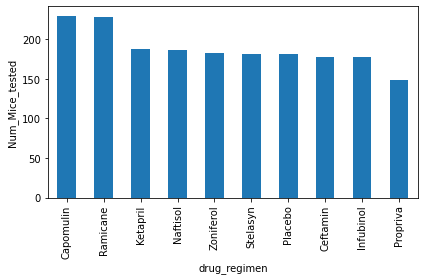

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = clean_mice['drug_regimen'].value_counts()
drug_count.plot(kind='bar')
plt.xlabel('drug_regimen')
plt.xticks(rotation=90)
plt.ylabel('Num_Mice_tested')
plt.tight_layout()
plt.show()


## Bar and Pie Charts

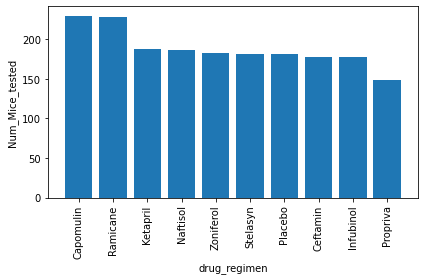

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_count = clean_mice['drug_regimen'].value_counts()
plt.bar(drug_count.index.values,drug_count.values)
plt.xlabel('drug_regimen')
plt.xticks(rotation=90)
plt.ylabel('Num_Mice_tested')
plt.tight_layout()
plt.show()

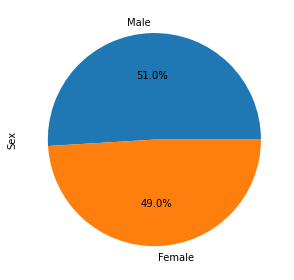

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_mice.Sex.value_counts()
sex_count.plot(kind='pie',autopct='%1.1f%%')
plt.tight_layout()
plt.show()

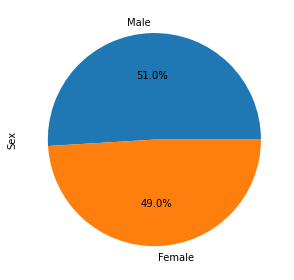

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_mice.Sex.value_counts()
plt.pie(sex_count.values,labels=sex_count.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_max = clean_mice.groupby(['mouse_id'])['Timepoint'].max()
tumor_max = tumor_max.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_merge = tumor_max.merge(clean_mice,on=['mouse_id','Timepoint'], how="left")
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    final_tumor_vol = drug_merge.loc[drug_merge['drug_regimen']==drug, 'tumor_vol_mm3']
# add subset 
    tumor_vol_list.append(final_tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
print(f"{drug}'s potential outliers: {outliers}")

Ceftamin's potential outliers: Series([], Name: tumor_vol_mm3, dtype: float64)


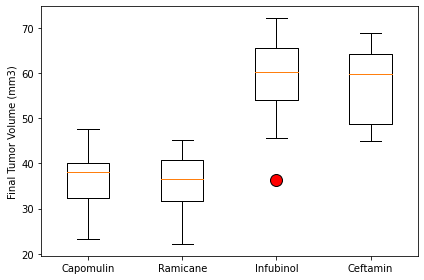

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

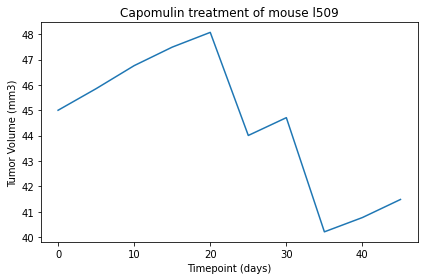

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_table = clean_mice.loc[clean_mice['drug_regimen']=='Capomulin']
mousedata = capo_table.loc[capo_table['mouse_id']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['tumor_vol_mm3'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.tight_layout()
plt.show()



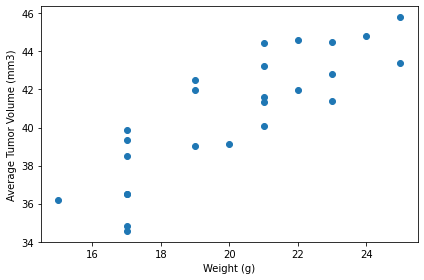

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_table = clean_mice.loc[clean_mice['drug_regimen']=='Capomulin']
capo_avg = capo_table.groupby(['mouse_id']).mean()
plt.scatter(capo_avg['weight_g'],capo_avg['tumor_vol_mm3'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


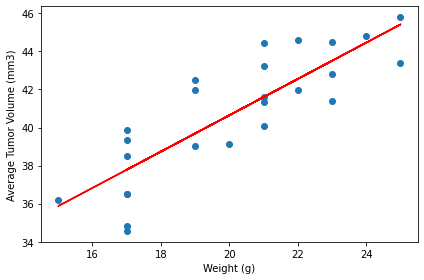

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capo_avg['weight_g'],capo_avg['tumor_vol_mm3'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capo_avg['weight_g'],capo_avg['tumor_vol_mm3'])
y_values = capo_avg['weight_g']*model[0]+model[1]
plt.scatter(capo_avg['weight_g'],capo_avg['tumor_vol_mm3'])
plt.plot(capo_avg['weight_g'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()